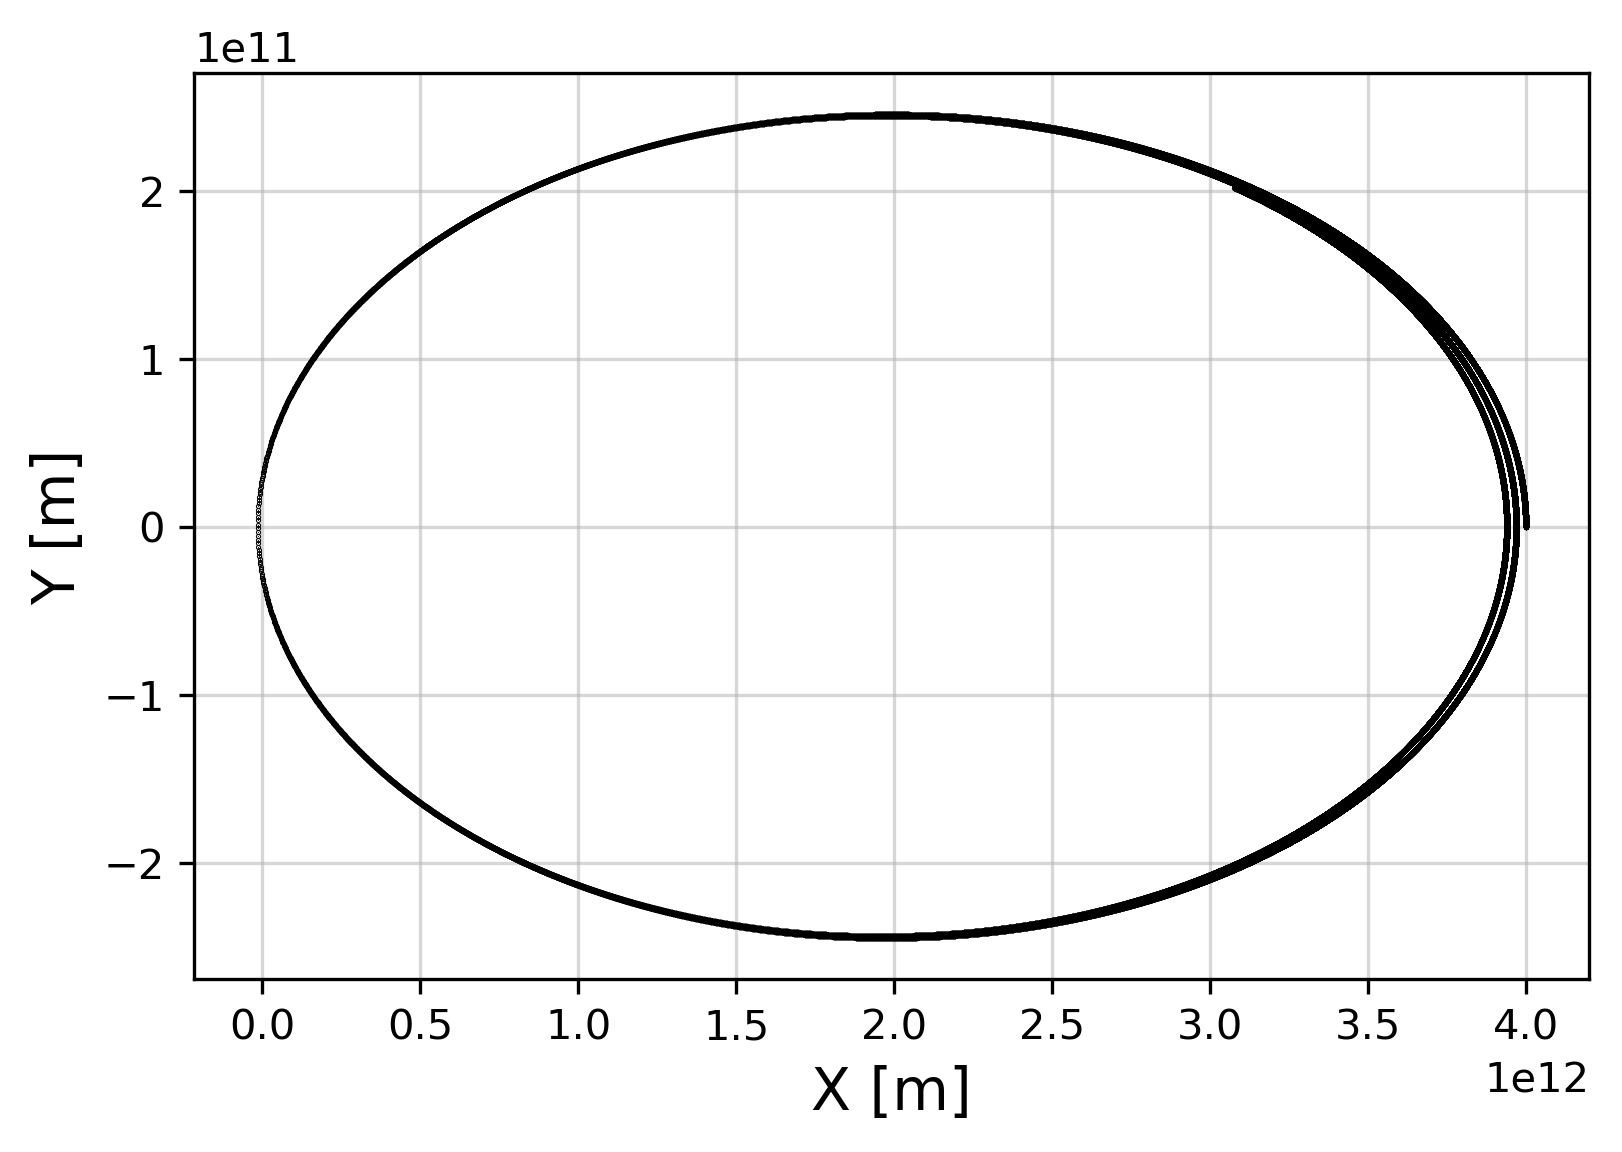

O tempo de execução foi de 95.088 segundos.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

def F(r):
    x, v_x = r[0,:]
    y, v_y = r[1,:]

    Dx = v_x
    Dy = v_y

    R = np.sqrt(x**2 + y**2)

    Dv_x = -G*M*x/R**3
    Dv_y = -G*M*y/R**3

    return np.array([[Dx,Dv_x],[Dy,Dv_y]],float)

start_time = time.time()

G = 6.67e-11
M = 1.99e30

# Condições Iniciais
r = np.array([[4e12,0],[0,500]], float)

#intervalo de tempo
a = 0
b = 3.5e9
h = (b-a)/1e5
T = np.arange(a,b,h)

#Inicialização da solução
x = np.array([])
y = np.array([])

for t in T:
    x = np.append(x, r[0,0])
    y = np.append(y, r[1,0])
    
    k1 = h*F(r)
    k2 = h*F(r + 0.5*k1)
    k3 = h*F(r + 0.5*k2)
    k4 = h*F(r + k3)
    r += (k1 + 2*k2 + 2*k3 + k4)/6

plt.figure(dpi = 300)
plt.plot(x, y,'.k', markersize = 0.5)
plt.grid(alpha = 0.5)
plt.xlabel("X [m]", size = 14)
plt.ylabel("Y [m]", size = 14)
plt.savefig('im_8_10a')
plt.show()

print("O tempo de execução foi de %.3f segundos." %((time.time() - start_time)))